In [1]:
import numpy as np
import pymc3 as pm
%matplotlib inline
import matplotlib.pylab as plt

In [2]:
from pkg_resources import get_distribution
import platform
print("python", platform.python_version())
print("")
libs = ["numpy", "matplotlib", "pymc3"]
for lib in libs:
    version = get_distribution(lib).version
    print(lib, version)

python 3.5.2

numpy 1.13.1
matplotlib 2.0.2
pymc3 3.1


In [3]:
# データ作成
N = 10
x_samples, y_samples = [], []
for i in range(N):
    x = round(np.random.rand()*4+3, 1) # 3.0〜7.0までの乱数
    mu = np.exp(1.5+0.1*x) # ポアソン分布の平均
    y = np.random.poisson(mu)
    x_samples.append(x)
    y_samples.append(y)
print(x_samples)
print(y_samples)

[4.1, 4.7, 3.5, 3.8, 5.4, 5.5, 5.2, 4.1, 3.7, 5.9]
[6, 8, 6, 11, 7, 8, 12, 13, 7, 9]


Optimization terminated successfully.
         Current function value: 80.754886
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13


100%|██████████| 1500/1500 [00:00<00:00, 1614.14it/s]



beta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.052            0.031            0.001            [-0.011, 0.108]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.007         0.028          0.054          0.074          0.114


beta2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.242            0.025            0.001            [0.192, 0.288]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.194          0.226          0.241          0.259          0.292



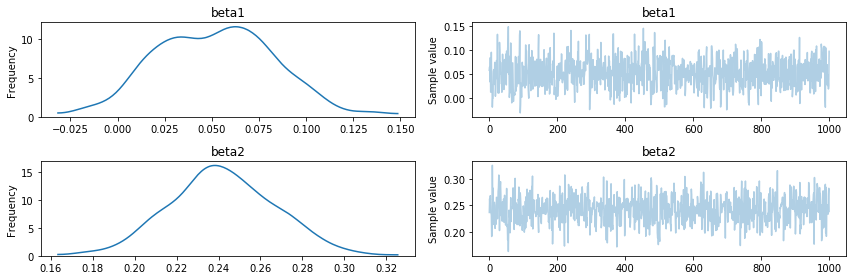

In [15]:
# 統計モデル
with pm.Model() as model:
    beta1 = pm.Normal("beta1", mu=0, tau=1000)
    beta2 = pm.Normal("beta2", mu=0, tau=1000)
    mu = np.exp(beta1+beta2*x_samples)
    y = pm.Poisson("y", mu=mu, observed=y_samples)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(1000, step, start=start)
    pm.summary(trace)
    pm.traceplot(trace)